# Fitbit Python Client Examples

In [32]:
from fitbit.client import FitbitClient

# As long as you have a .env file in the root of the project with the correct credentials, you can just run this:   
fitbit = FitbitClient()

In [33]:
# For this demonstration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Daily Steps

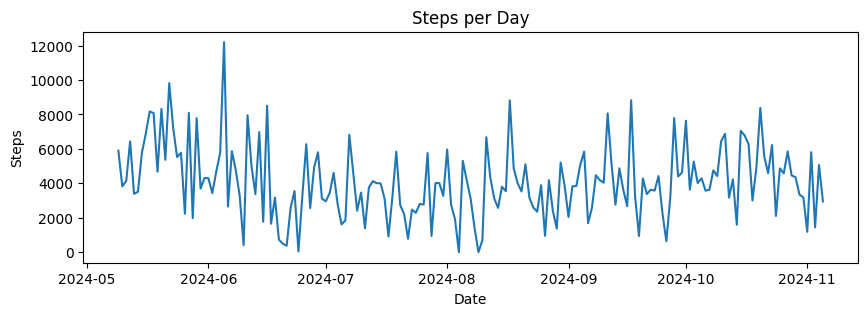

In [34]:
df = pd.DataFrame(fitbit.get_activity_time_series_by_range(fitbit.ActivityResource.STEPS, fitbit.Dates.PAST_HALF_YEAR, fitbit.Dates.TODAY)['activities-steps'])
df['dateTime'] = pd.to_datetime(df['dateTime'])
df['value'] = pd.to_numeric(df['value'])

# plot size 
plt.figure(figsize=(10, 3))

# plot the data
plt.plot(df['dateTime'], df['value'])

# add labels
plt.xlabel('Date')
plt.ylabel('Steps')
plt.title('Steps per Day')
plt.show()

### Hours of Sleep

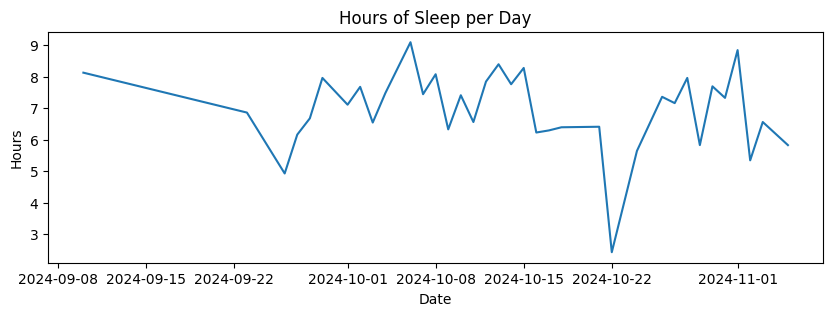

In [35]:
df = pd.DataFrame(fitbit.get_sleep_log_by_date_range(fitbit.Dates.PAST_QUARTER, fitbit.Dates.TODAY))

x = 'dateOfSleep'
y = 'minutesAsleep'

df[x] = pd.to_datetime(df[x])
df[y] = [x / 60 for x in pd.to_numeric(df[y])] # mins to hours

# plot size 
plt.figure(figsize=(10, 3))

# plot the data
plt.plot(df[x], df[y])

# add labels
plt.xlabel('Date')
plt.ylabel('Hours') 
plt.title('Hours of Sleep per Day')
plt.show()

### Sleep Quality

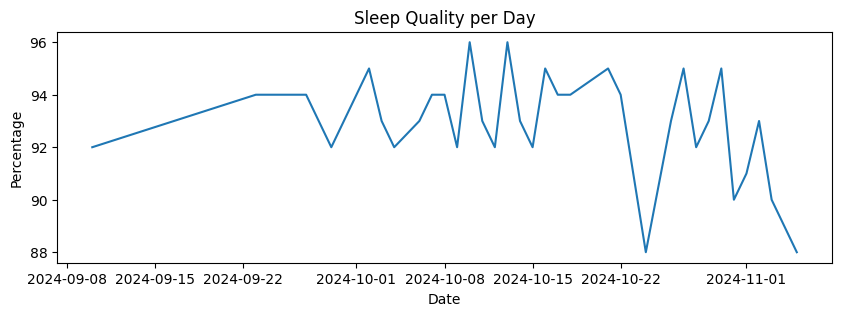

In [36]:
df # still sleep df
df.keys()

y = 'efficiency'

df[y] = pd.to_numeric(df[y])

# plot size 
plt.figure(figsize=(10, 3))

# plot the data
plt.plot(df[x], df[y])

# add labels
plt.xlabel('Date')
plt.ylabel('Percentage') 
plt.title('Sleep Quality per Day')
plt.show()


### When Do I Fall Asleep?

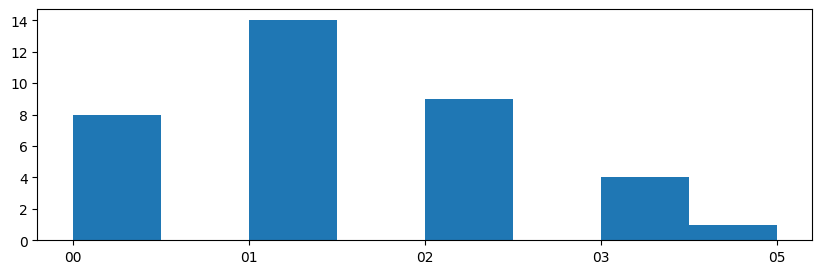

In [37]:
# convert startTime to start time of day HH:MM
df['startTime'] = pd.to_datetime(df['startTime'])
df['startTimeFormatted'] = df['startTime'].dt.strftime('%H')
df.sort_values(by='startTime', inplace=True)
y='startTimeFormatted'

plt.figure(figsize=(10, 3))
plt.hist(df[y].sort_values(), bins=8)
plt.show()

### Sleep Stages (with some style)

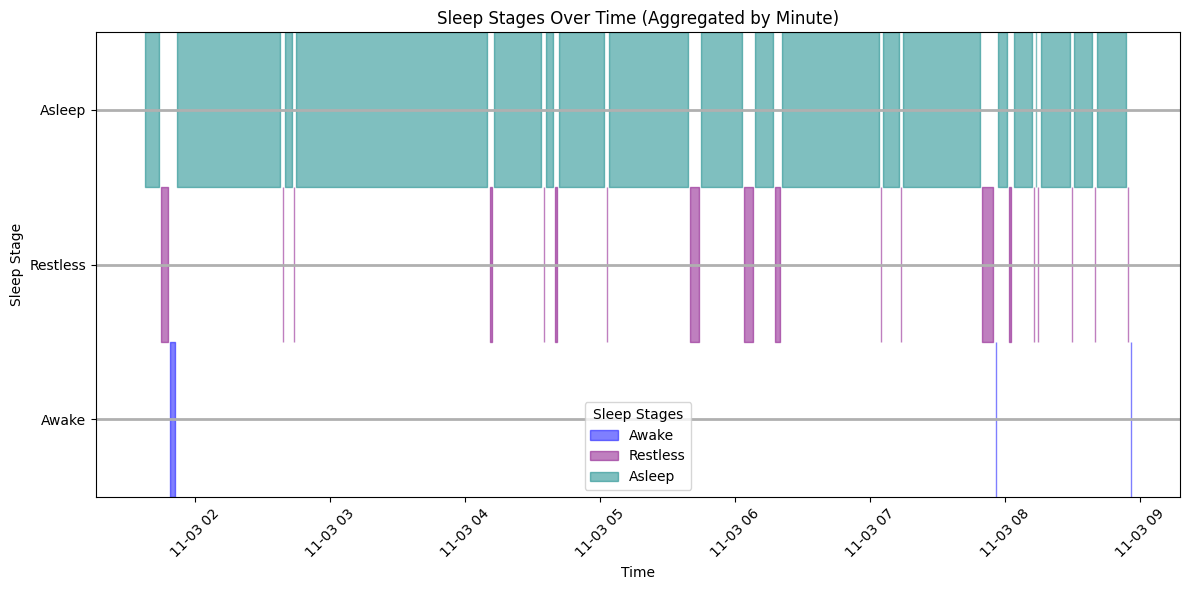

In [38]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# A specific sleep log
df = pd.DataFrame([x for x in df['levels']][34]['data']).sort_values(by='dateTime')

# Ensure 'dateTime' is in datetime format
df['dateTime'] = pd.to_datetime(df['dateTime'])

# Map levels to numeric values for simpler visualization
level_mapping = {'awake': 1, 'restless': 2, 'asleep': 3}
df['level_numeric'] = df['level'].map(level_mapping)

# Aggregate by minute, then forward-fill to fill in gaps
df_minutely = df.set_index('dateTime').resample('T').last().ffill().reset_index()

# Plotting with separate fills for each stage to create distinct bands
plt.figure(figsize=(12, 6))

# Fill each sleep stage range with new colors
plt.fill_between(df_minutely['dateTime'], 0.5, 1.5, where=(df_minutely['level_numeric'] == 1), 
                 step="post", color="blue", alpha=0.5, label='Awake')
plt.fill_between(df_minutely['dateTime'], 1.5, 2.5, where=(df_minutely['level_numeric'] == 2), 
                 step="post", color="purple", alpha=0.5, label='Restless')
plt.fill_between(df_minutely['dateTime'], 2.5, 3.5, where=(df_minutely['level_numeric'] == 3), 
                 step="post", color="teal", alpha=0.5, label='Asleep')

# Customize the plot to resemble the desired style
plt.yticks([1, 2, 3], ['Awake', 'Restless', 'Asleep'])
plt.ylim(0.5, 3.5)
plt.xlabel('Time')
plt.ylabel('Sleep Stage')
plt.title('Sleep Stages Over Time (Aggregated by Minute)')
plt.grid(True, axis='y', linestyle='-', linewidth=2)

plt.xticks(rotation=45)
plt.legend(title="Sleep Stages")
plt.tight_layout()
plt.show()